In [1]:
%display latex

In [9]:
from itertools import product
from itertools import permutations
from itertools import combinations
from collections import defaultdict
import time

In [10]:
#SET UP
n =3
q = 2
#FF = GF(9,'c')
FF = GF(q)
so = FF.cardinality()^n-1
thm = (FF.cardinality()^n-1)^(n-1)
mult = (q-1)^(n-1)*(add([q^i for i in range(n)])^(n-2))
G = GL(n, FF)
M = MatrixSpace(FF,n,n)
V = VectorSpace(FF,n)
fact = (q^n-1)^(n-1)
nq=gaussian_binomial(n,1,q=q)

In [11]:
def get_hyperplanes(): #generate all hyperplanes of gl(n,q)
    H = []
    for i in range(n):
        h = matrix(FF,n-1,n)
        for j in range(n):
            if j<i:
                h[j,j] = 1
            if j>i:
                h[j-1,j] = 1
        if i >0:
            comblist = [p for p in product(GF(q), repeat=i)]
            num = len(comblist)
            for k in range(num):
                b = h
                v = comblist[k]
                for l in range(i):
                    b[l,i] = v[l]
                H.append(copy(b))
        else: H.append(h)
    return H

def get_singer(): #find all singer cycles in a list
    S = []
    for g in G:
        if g.multiplicative_order() == so:
            S.append(g)
    return S

def get_reg_ells():
    S = []
    #D = defaultdict(int)
    #D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            #D[cp] += 1
            #D2[cp] += (g,)
            S.append(g)
    return S

def sing_with_det(alp):
    c1=[]
    for c in L:
        if c.matrix().determinant() == alp:
            c1.append(c)
    return c1

def insert_row(M,k,row):
    return matrix(FF,M.rows()[:k]+[row]+M.rows()[k:])

def get_reg_ells():
    S = []
    D = defaultdict(int)
    D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            D[cp] += 1
            D2[cp] += (g,)
            S.append(g)
    return S, D, D2

#generate 1-dim vectors
def get_v1():
    H=get_hyperplanes()
    vec=[]
    for h in H:
        m=transpose(matrix(FF,h))
        v=kernel(m)
        vec.append(v)
    return vec

In [12]:
H=get_hyperplanes()

In [15]:
Hlist

[
[0 1 0]  [1 0 0]  [1 0 0]
[0 0 1], [0 0 1], [0 1 0]
]

In [14]:
Hlist = []
for i in range(n):
    alp = list(range(n))
    alp.remove(i)
    init = matrix(FF, n-1, n, 0)
    #zero = matrix(FF, 1, n, 0)
    for j in range(n-1):
        init[j, alp[j]] = 1
    Hlist.append(init)

#I HAVE NOT GENEARLIZED THIS CODE YET!!!
#MAKE SURE TO RESET n AND THE DEFINITIONS
#First, try to build all possible invertible matrices with a fixed diagonal support. det (1,2,1,1)
if n == 4: 
    
    #this builds all the v_i sequence with necessary (but not sufficient) conditions for them to be a factorization of a singer cycle
    def invertible_vi(dlist):
        Vm =[]
        comblist = [p for p in product(GF(q), repeat=n-1)]   
        '''n=4 case turn on here'''
        [d1,d2,d3,d4]=dlist
        m = matrix(FF,n,n,0)
        for c in comblist:
            #m[0,:] = [dlist[0],c[0],c[1], c[2]]
            m[0,0],m[1,0],m[2,0],m[3,0] = d1-1, c[0], c[1], c[2]
            for d in comblist:
                #m[1,:] = [d[0],dlist[1]-1, d[1],d[2]]
                m[0,1],m[1,1],m[2,1],m[3,1] = d[0],d2-1,d[1],d[2]
                for e in comblist:
                    #m[2,:] = [e[0],e[1],dlist[2]-1, e[2]]
                    m[0,2],m[1,2],m[2,2],m[3,2] = e[0],e[1],d3-1,e[2]
                    for h in comblist:
                        #m[3,:] = [h[0],h[1],h[2],dlist[3]-1]
                        m[0,3],m[1,3],m[2,3],m[3,3] = h[0],h[1],h[2],d4-1
                        if m in G:
                            Vm.append(copy(m))
        allv = []
        for m in Vm:
            Rlist = []
            for i in range(n):
                v=vector(m[:,i])
                v[i]=v[i]+1
                v =vector(FF,v)
                hyp = insert_row(Hlist[i],i,v)
                ref = matrix(FF, hyp)
                Rlist.append(ref)
            allv.append(Rlist)
        return allv



    def get_regell():
        fact = []
        reg= []
        notfact=[]
        notreg=[]
        for r in allv:
            c = r[0]*r[1]*r[2]*r[3]
            f= matrix(c).charpoly()
            #if f == g:
            if f.is_irreducible():
            #if c.multiplicative_order() == so:
                fact.append(r)
                reg.append(c)
            else:
                notfact.append(r)
                notreg.append(c)
        return fact,reg,notfact,notreg

    def get_sing(reg):
        sing=[]
        just_reg=[]
        for g in reg:
            if g.multiplicative_order() == so:
                sing.append(g)
            else:
                just_reg.append(g)
        return sing,just_reg


    #singer/regellp with a fixed charpoly poly g
    def get_singer_conj(g):
        #g=sing[10].charpoly()
        fact_g=[]
        sing_g=[]
        for rr in fact:
            c=rr[0]*rr[1]*rr[2]*rr[3]
            f=matrix(c).charpoly()
            if f == g:
                fact_g.append(rr)
                sing_g.append(c)
        return fact_g,sing_g

if n==3:
    def invertible_vi(dlist):
        Vm =[]
        comblist = [p for p in product(GF(q), repeat=n-1)]   
        '''n = 3 case turn on here'''
        [d1,d2,d3] = dlist
        for c in comblist:
            m = matrix(FF,n,n,0)
            m[0,0],m[1,0], m[2,0] = d1-1,c[0],c[1]
            for d in comblist:
                m[0,1],m[1,1],m[2,1]= d[0],d2-1, d[1]
                for e in comblist:
                    m[0,2],m[1,2],m[2,2] = e[0],e[1],d3-1
                    if m in G:
                         Vm.append(copy(m))
        allv = []
        for m in Vm:
            Rlist = []
            for i in range(n):
                v=vector(m[:,i])
                v[i]=v[i]+1
                v =vector(FF,v)
                hyp = insert_row(Hlist[i],i,v)
                ref = matrix(FF, hyp)
                Rlist.append(ref)
            allv.append(Rlist)
        return allv



    def get_regell():
        fact = []
        reg= []
        notfact=[]
        notreg=[]
        for r in allv:
            c = r[0]*r[1]*r[2]
            f= matrix(c).charpoly()
            #if f == g:
            if f.is_irreducible():
            #if c.multiplicative_order() == so:
                fact.append(r)
                reg.append(c)
            else:
                notfact.append(r)
                notreg.append(c)
        return fact,reg,notfact,notreg

    def get_sing(reg):
        sing=[]
        just_reg=[]
        for g in reg:
            if g.multiplicative_order() == so:
                sing.append(g)
            else:
                just_reg.append(g)
        return sing,just_reg


    #singer/regellp with a fixed charpoly poly g
    def get_singer_conj(g):
        #g=sing[10].charpoly()
        fact_g=[]
        sing_g=[]
        for rr in fact:
            c=rr[0]*rr[1]*rr[2]
            f=matrix(c).charpoly()
            if f == g:
                fact_g.append(rr)
                sing_g.append(c)
        return fact_g,sing_g

In [75]:
#SetUp: first need to generate the factorization of a singer with charpoly g, and determinant dlist

In [16]:
#change the determiant list

allv=invertible_vi([1,1,1])
fact,reg,notfact,notreg=get_regell()
sing,just_reg=get_sing(reg)

In [17]:
#I believe that this is a list of all singer/reg with determinant c = d1*d2*d3
len(sing)

14

In [18]:
c = sing[6]
c

[1 1 1]
[0 1 1]
[1 0 1]

In [19]:
#list of conjugation class to choose one
conju=[]
for c in sing:
    f=c.charpoly()
    if f not in conju:
        conju.append(f)
conju

[x^3 + x^2 + 1, x^3 + x + 1]

In [29]:
#choose a conjugation class, then get the list of singer of the conjugation class with all the factorizations
g=conju[0]
fact_g,sing_g=get_singer_conj(g)

In [112]:
#This is a list of all singer cycles with char poly g


In [25]:
sing_g[0].inverse()

[1 0 1]
[1 1 1]
[1 1 0]

In [26]:
sing_g[0]

[1 1 1]
[1 1 0]
[0 1 1]

In [152]:
#fact = factorization, c = singer
#returns the cyclic orbit
# def cyclic_orbit(fact, c):
#     cyclic=[]
#     while 1:
#         f = fact[-1]
#         fact.remove(f)
#         fact.insert(0,c*f*c^(-1))
#         if fact not in cyclic:
#             cyclic.append(copy(fact))
#         else:
#             break
#     return cyclic

In [175]:
cyc =cyclic_orbit(fact_g[3],sing[3])

In [254]:
newvec

[Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 0 0 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 0 1 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 0 1 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 0 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 0 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 1 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 1 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 0 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 0 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 1 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 1 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 0 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 0 1],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 1 0],
 Vector space of degree 4 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 1 1]]

In [24]:
vec=get_v1()
newvec = [0] * nq
for v in vec:
    #b =  (2^3)*int(v[1][0]) + (2^2) * int(v[1][1]) + (2^1) * int(v[1][2]) +  (2^0) * int(v[1][3])
    b =  (2^2) * int(v[1][0]) + (2^1) * int(v[1][1]) +  (2^0) * int(v[1][2])
    newvec[b-1]=v

# label = []
# for v in newvec:
#     v1=v.basis()
#     label.append(v1)
# vertex={}
# for v in range(nq):
#     vertex[v]=str(label[v][0])

def get_edge(r):
    edge=[]
    for v in newvec:
            w = v*r
            if v!=w:
                edge.append([newvec.index(v),newvec.index(w)])
    return edge

#input a factorzation [r1,r2,r3]
def get_edges(rrr):
    edges=[]
    for i in range(n):
        edge=get_edge(rrr[i])
        edges.append(edge)
    return edges

#n_q x n_q matrix, put 1 for each edge correspondnce to build the adjacency matrix for each r_i
def adj_matrix(edge):
    M=matrix(nq)
    for e in edge:
        M[e[0],e[1]]=1
    return M

def get_adj_matrix(rrr):
    edges=get_edges(rrr)
    Mlist=[]
    for i in range(n):
        M2=matrix(nq)
        for e in edges[i]:
            M2[e[0],e[1]]=1
        Mlist.append(M2)
    return Mlist

In [25]:
label = []
for v in newvec:
    v1=v.basis()
    label.append(v1)
vertex={}
for v in range(nq):
    vertex[v]=str(label[v][0])

In [84]:
newvec

[Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 0 1], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 0], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [0 1 1], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 0], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 0 1], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 0], Vector space of degree 3 and dimension 1 over Finite Field of size 2
 Basis matrix:
 [1 1 1]]

In [115]:
def is_reflection(g):
    n = G.degree()
    M = g.matrix() - (G[0]^0).matrix()
    KM = M.kernel()
    return KM.dimension() == n-1

def is_transvection(g):
    return is_reflection(g) and M(g).det() == 1


def get_transvections(): #find all transvection in a list
    R = []
    for g in G:
        if is_transvection(g):
            R.append(g)
    return R

def get_refls(): #find all reflections in a list
    R = []
    for g in G:
        if is_reflection(g):
            R.append(g)
    return R

In [86]:
len(just_reg),len(reg),len(sing)

(0, 14, 14)

In [87]:
vertex

{0: '(0, 0, 1)',
 1: '(0, 1, 0)',
 2: '(0, 1, 1)',
 3: '(1, 0, 0)',
 4: '(1, 0, 1)',
 5: '(1, 1, 0)',
 6: '(1, 1, 1)'}

In [26]:
if n == 4:
    for rrr in fact_g:    
        [M1,M2,M3,M4]=get_adj_matrix(rrr)
        Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3),DiGraph(M4)
        alledge=[]
        for i in range(n):
            for u,v,l in Dlist[i].edges():
                Dlist[i].set_edge_label(u,v,str(i))
            alledge = alledge+Dlist[i].edges()
        D=DiGraph()
        D.add_edges(alledge)
        D.relabel(vertex)
        G=D.to_undirected()
    G.graphplot(color_by_label=True,vertex_size=0,layout='spring').show()
        
if n == 3:
    for rrr in fact_g:    
        [M1,M2,M3]=get_adj_matrix(rrr)
        Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3)
        alledge=[]
        for i in range(n):
            for u,v,l in Dlist[i].edges():
                Dlist[i].set_edge_label(u,v,str(i))
            alledge = alledge+Dlist[i].edges()
        D=DiGraph()
        D.add_edges(alledge)
        D.relabel(vertex)
        G=D.to_undirected()
        #G.graphplot(color_by_label=True,vertex_size=0,layout='spring').show()

In [31]:
newlist=[]
while len(fact_g)>0:
    for rrr in fact_g:
        conj=[]
        for m in diag:
            new=[]
            for r in rrr:
                r1=m^(-1)*r*m
                new.append(r1)
            fact_g.remove(new)
            conj.append(new)
        newlist.append(conj)

NameError: name 'diag' is not defined

In [117]:
def labeled_tree2fact(ep):
    return [(e[0]+1,e[1]+1) for e in ep]

GG=SymmetricGroup(nq)

In [118]:
nq

15

In [119]:
#print out the factorizations in its symm group embeddings
#input a list of factorizations
def symm_emb(fact):
    for rrr in fact:  
        symm=[]
        Mlist =get_adj_matrix(rrr)
        for m in Mlist:
            D= DiGraph(m)
            G=D.to_undirected()
        #print(G.edges())
            edge = labeled_tree2fact(G.edges())
            refl = GG(edge)
            symm.append(refl)
        print(symm, prod(symm))

In [120]:
symm_emb(fact_g)

[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,7)(3,6)(10,15)(11,14), (1,13)(3,15)(5,9)(7,11)] (1,13,7,9,8,5,2,11,3,6,4,15,12,10,14)
[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,10)(3,11)(6,14)(7,15), (1,15)(3,13)(5,11)(7,9)] (1,15,12,9,8,7,11,2,10,13,6,4,14,3,5)
[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,11)(3,10)(6,15)(7,14), (1,5)(3,7)(9,13)(11,15)] (1,5,14,9,8,13,3,10,2,15,12,6,4,11,7)
[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,14)(3,15)(6,10)(7,11), (1,7)(3,5)(9,15)(11,13)] (1,7,3,9,8,15,12,5,13,2,14,11,6,4,10)
[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,15)(3,14)(6,11)(7,10), (1,11)(3,9)(5,15)(7,13)] (1,11,13,9,8,3,14,7,15,12,2,5,10,6,4)
[(8,9)(10,11)(12,13)(14,15), (4,7)(5,6)(12,15)(13,14), (2,6)(3,7)(10,14)(11,15), (1,15)(3,13)(5,11)(7,9)] (1,15,3,9,8,7,4,13,5,2,6,11,14,12,10)
[(8,9)(10,11)(12,13)(14,15), (4,7)(5,6)(12,15)(13,14), (2,7)(3,6)(10,15)(11,14), (1,11)(3,9)(5,15)(7,13)] (1,11,5,9,8,3,6,15,7,4,2,13,10

In [42]:
fact_g[3]

[
[1 1 0]  [1 0 0]  [1 0 0]
[0 1 0]  [1 1 1]  [0 1 0]
[0 0 1], [0 0 1], [1 0 1]
]

In [93]:
# fact = factorization, c = singer
# returns the cyclic orbit
def hurwitz_orbit(single_fact, c):
    fact=single_fact
    hurwitz=[]
    while 1:
        f = fact[1]
        fact.remove(f)
        fact.insert(0,c*f*c^(-1))
        if fact not in hurwitz:
            hurwitz.append(copy(fact))
        else:
            break
    return hurwitz

In [95]:
f_test=fact_g[3]
c_test=sing_g[3]

In [96]:
hurwitz =hurwitz_orbit(f_test,c_test)

In [58]:
len(hurwitz)

14

In [98]:
hurwitz

[[
[1 0 1]  [1 1 0]  [1 0 0]
[0 1 1]  [0 1 0]  [0 1 0]
[0 0 1], [0 0 1], [1 0 1]
],
 [
[0 0 1]  [1 0 1]  [1 0 0]
[0 1 0]  [0 1 1]  [0 1 0]
[1 0 0], [0 0 1], [1 0 1]
],
 [
[1 0 0]  [0 0 1]  [1 0 0]
[1 0 1]  [0 1 0]  [0 1 0]
[1 1 0], [1 0 0], [1 0 1]
],
 [
[1 0 0]  [1 0 0]  [1 0 0]
[0 1 1]  [1 0 1]  [0 1 0]
[0 0 1], [1 1 0], [1 0 1]
],
 [
[1 0 0]  [1 0 0]  [1 0 0]
[0 1 0]  [0 1 1]  [0 1 0]
[1 0 1], [0 0 1], [1 0 1]
],
 [
[0 1 1]  [1 0 0]  [1 0 0]
[1 0 1]  [0 1 0]  [0 1 0]
[0 0 1], [1 0 1], [1 0 1]
],
 [
[0 1 0]  [0 1 1]  [1 0 0]
[1 0 0]  [1 0 1]  [0 1 0]
[1 1 1], [0 0 1], [1 0 1]
],
 [
[1 0 0]  [0 1 0]  [1 0 0]
[1 1 0]  [1 0 0]  [0 1 0]
[1 0 1], [1 1 1], [1 0 1]
],
 [
[1 1 1]  [1 0 0]  [1 0 0]
[0 1 0]  [1 1 0]  [0 1 0]
[0 0 1], [1 0 1], [1 0 1]
],
 [
[1 0 0]  [1 1 1]  [1 0 0]
[0 1 0]  [0 1 0]  [0 1 0]
[1 1 1], [0 0 1], [1 0 1]
],
 [
[1 1 0]  [1 0 0]  [1 0 0]
[0 1 0]  [0 1 0]  [0 1 0]
[0 1 1], [1 1 1], [1 0 1]
],
 [
[1 1 1]  [1 1 0]  [1 0 0]
[0 0 1]  [0 1 0]  [0 1 0]
[0 1 0], [0 1 1], [1 

In [99]:
symm_emb(hurwitz)

[(2,3)(4,5), (4,6)(5,7), (1,5)(3,7)] (1,5,6,4,3,2,7)
[(1,4)(3,6), (2,3)(4,5), (1,5)(3,7)] (2,7,3,6)(4,5)
[(1,6)(2,5), (1,4)(3,6), (1,5)(3,7)] (1,7,3,6,4,5,2)
[(2,3)(6,7), (1,6)(2,5), (1,5)(3,7)] (1,6,3)(2,7,5)
[(1,5)(3,7), (2,3)(6,7), (1,5)(3,7)] (2,7)(3,6)
[(2,5)(3,4), (1,5)(3,7), (1,5)(3,7)] (2,5)(3,4)
[(1,7)(2,4), (2,5)(3,4), (1,5)(3,7)] (1,3,4)(2,7,5)
[(1,5)(2,6), (1,7)(2,4), (1,5)(3,7)] (2,6,4)(3,7,5)
[(4,7)(5,6), (1,5)(2,6), (1,5)(3,7)] (2,6,5)(3,7,4)
[(1,7)(3,5), (4,7)(5,6), (1,5)(3,7)] (1,4,3,6)(5,7)
[(1,3)(4,6), (1,7)(3,5), (1,5)(3,7)] (4,6)(5,7)
[(1,2)(4,7), (1,3)(4,6), (1,5)(3,7)] (1,2,7,6,4,3,5)
[(2,7)(3,6), (1,2)(4,7), (1,5)(3,7)] (1,2,4,3,6,7,5)
[(4,6)(5,7), (2,7)(3,6), (1,5)(3,7)] (1,5,2,3,6,4,7)


In [94]:
fact_g[3]

[
[1 1 0]  [1 0 0]  [1 0 0]
[0 1 0]  [1 1 1]  [0 1 0]
[0 0 1], [0 0 1], [1 0 1]
]

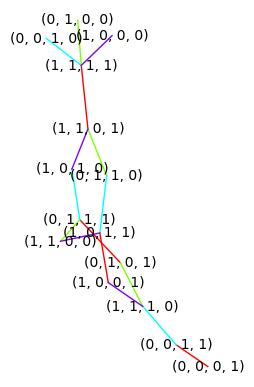

In [266]:
rrr = fact_g[-1]   
[M1,M2,M3,M4]=get_adj_matrix(rrr)
Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3),DiGraph(M4)
alledge=[]
for i in range(n):
    for u,v,l in Dlist[i].edges():
        Dlist[i].set_edge_label(u,v,str(i))
    alledge = alledge+Dlist[i].edges()
D=DiGraph()
D.add_edges(alledge)
D.relabel(vertex)
G=D.to_undirected()
G.graphplot(color_by_label=True,vertex_size=0,layout='spring').show()

In [267]:
fact_g[-1]

[
[1 1 1 1]  [1 0 0 0]  [1 0 0 0]  [1 0 0 0]
[0 1 0 0]  [1 1 1 1]  [0 1 0 0]  [0 1 0 0]
[0 0 1 0]  [0 0 1 0]  [1 1 1 1]  [0 0 1 0]
[0 0 0 1], [0 0 0 1], [0 0 0 1], [0 0 1 1]
]

In [115]:
symm_emb(cyc)

[(1,4)(2,7), (4,6)(5,7), (2,7)(3,6)] (1,3,6,4)(2,5)
[(1,6)(3,4), (1,4)(2,7), (4,6)(5,7)] (1,4,3)(2,5,7)
[(1,7)(3,5), (1,6)(3,4), (1,4)(2,7)] (1,2,7,6,4,3,5)
[(1,6)(2,5), (1,7)(3,5), (1,6)(3,4)] (2,4,3,5)(6,7)
[(2,3)(4,5), (1,6)(2,5), (1,7)(3,5)] (1,6,7)(2,5,4)
[(1,2)(4,7), (2,3)(4,5), (1,6)(2,5)] (1,3,5,4,7,2,6)
[(2,3)(6,7), (1,2)(4,7), (2,3)(4,5)] (1,3)(4,7,6,5)
[(4,6)(5,7), (2,3)(6,7), (1,2)(4,7)] (1,2,3)(5,6,7)
[(1,5)(2,6), (4,6)(5,7), (2,3)(6,7)] (1,6,3,2,4,7,5)
[(1,3)(4,6), (1,5)(2,6), (4,6)(5,7)] (1,3,7,5)(2,4)
[(1,7)(3,5), (1,3)(4,6), (1,5)(2,6)] (1,7,3)(2,6,4)
[(2,7)(3,6), (1,7)(3,5), (1,3)(4,6)] (1,7,2,3,4,6,5)
[(2,4)(3,5), (2,7)(3,6), (1,7)(3,5)] (1,7,2,4)(5,6)
[(1,2)(4,7), (2,4)(3,5), (2,7)(3,6)] (1,4,2)(3,5,6)
[(1,6)(3,4), (1,2)(4,7), (2,4)(3,5)] (1,6,4,5,3,7,2)
[(4,7)(5,6), (1,6)(3,4), (1,2)(4,7)] (1,6,5,2)(3,7)
[(1,5)(2,6), (4,7)(5,6), (1,6)(3,4)] (2,5,6)(3,4,7)
[(2,3)(4,5), (1,5)(2,6), (4,7)(5,6)] (1,6,2,3,5,7,4)
[(1,5)(3,7), (2,3)(4,5), (1,5)(2,6)] (1,4)(2,3,7,6)
[(2,7)

In [165]:
len(cyc1)

21

In [159]:
symm_emb(cyc1)

[(1,2)(4,7), (4,6)(5,7), (2,7)(3,6)] (1,7,3,6,4,5,2)
[(1,5)(3,7), (1,2)(4,7), (4,6)(5,7)] (1,7,3,6,4,5,2)
[(1,4)(3,6), (1,5)(3,7), (1,2)(4,7)] (1,7,3,6,4,5,2)
[(1,6)(2,5), (1,4)(3,6), (1,5)(3,7)] (1,7,3,6,4,5,2)
[(1,7)(2,4), (1,6)(2,5), (1,4)(3,6)] (1,7,3,6,4,5,2)
[(2,6)(3,7), (1,7)(2,4), (1,6)(2,5)] (1,7,3,6,4,5,2)
[(2,3)(4,5), (2,6)(3,7), (1,7)(2,4)] (1,7,3,6,4,5,2)
[(1,2)(5,6), (2,3)(4,5), (2,6)(3,7)] (1,7,3,6,4,5,2)
[(1,7)(3,5), (1,2)(5,6), (2,3)(4,5)] (1,7,3,6,4,5,2)
[(4,6)(5,7), (1,7)(3,5), (1,2)(5,6)] (1,7,3,6,4,5,2)
[(2,5)(3,4), (4,6)(5,7), (1,7)(3,5)] (1,7,3,6,4,5,2)
[(1,2)(4,7), (2,5)(3,4), (4,6)(5,7)] (1,7,3,6,4,5,2)
[(1,4)(3,6), (1,2)(4,7), (2,5)(3,4)] (1,7,3,6,4,5,2)
[(4,5)(6,7), (1,4)(3,6), (1,2)(4,7)] (1,7,3,6,4,5,2)
[(1,6)(2,5), (4,5)(6,7), (1,4)(3,6)] (1,7,3,6,4,5,2)
[(2,6)(3,7), (1,6)(2,5), (4,5)(6,7)] (1,7,3,6,4,5,2)
[(1,3)(4,6), (2,6)(3,7), (1,6)(2,5)] (1,7,3,6,4,5,2)
[(2,3)(4,5), (1,3)(4,6), (2,6)(3,7)] (1,7,3,6,4,5,2)
[(1,7)(3,5), (2,3)(4,5), (1,3)(4,6)] (1,7,3,6,

In [ ]:
#conjugation class:
conju=[]
for c in sing:
    f=c.charpoly()
    if f not in conju:
        conju.append(f)
conju

In [158]:
cyc1=cyclic_orbit(fact_g[1],sing_g[1])

In [115]:
# GG= SymmetricGroup(15)
# rr1=[GG([(8,15),(9,14),(10,13),(11,12)]), GG([(8,14),(9,15),(10,12),(11,13)]), GG([(8,13),(9,12),(10,15),(11,14)]), GG([(8,12),(9,13),(10,14),(11,15)]), GG([(8,11),(9,10),(12,15),(13,14)]), GG([(8,10),(9,11),(12,14),(13,15)]), GG([(8,9),(10,11),(12,13),(14,15)])]
# rr2=[GG([(4,14),(5,15),(6,12),(7,13)]), GG([(4,13),(5,12),(6,15),(7,14)]), GG([(4,12),(5,13),(6,14),(7,15)]), GG([(4,7),(5,6),(12,15),(13,14)]), GG([(4,6),(5,7),(12,14),(13,15)]), GG([(4,5),(6,7),(12,13),(14,15)]), GG([(4,15),(5,14),(6,13),(7,12)])]
# rr3=[GG([(2,15),(3,14),(6,11),(7,10)]), GG([(2,11),(3,10),(6,15),(7,14)]), GG([(2,10),(3,11),(6,14),(7,15)]), GG([(2,7),(3,6),(10,15),(11,14)]), GG([(2,3),(6,7),(10,11),(14,15)]), GG([(2,14),(3,15),(6,10),(7,11)]), GG([(2,6),(3,7),(10,14),(11,15)])]
# rr4=[GG([(1,3),(5,7),(9,11),(13,15)]), GG([(1,5),(3,7),(9,13),(11,15)]), GG([(1,11),(3,9),(5,15),(7,13)]), GG([(1,7),(3,5),(9,15),(11,13)]), GG([(1,15),(3,13),(5,11),(7,9)]), GG([(1,9),(3,11),(5,13),(7,15)]), GG([(1,13),(3,15),(5,9),(7,11)])]


GG= SymmetricGroup(15)
rr1=[GG([(9,14),(10,13),(11,12)]), GG([(9,15),(10,12),(11,13)]), GG([(9,12),(10,15),(11,14)]), GG([(9,13),(10,14),(11,15)]), GG([(9,10),(12,15),(13,14)]), GG([(9,11),(12,14),(13,15)]), GG([(10,11),(12,13),(14,15)])]
rr2=[GG([(5,15),(6,12),(7,13)]), GG([(5,12),(6,15),(7,14)]), GG([(5,13),(6,14),(7,15)]), GG([(5,6),(12,15),(13,14)]), GG([(5,7),(12,14),(13,15)]), GG([(6,7),(12,13),(14,15)]), GG([(5,14),(6,13),(7,12)])]
rr3=[GG([(3,14),(6,11),(7,10)]), GG([(3,10),(6,15),(7,14)]), GG([(3,11),(6,14),(7,15)]), GG([(3,6),(10,15),(11,14)]), GG([(6,7),(10,11),(14,15)]), GG([(3,15),(6,10),(7,11)]), GG([(3,7),(10,14),(11,15)])]
rr4=[GG([(5,7),(9,11),(13,15)]), GG([(3,7),(9,13),(11,15)]), GG([(3,9),(5,15),(7,13)]), GG([(3,5),(9,15),(11,13)]), GG([(3,13),(5,11),(7,9)]), GG([(3,11),(5,13),(7,15)]), GG([(3,15),(5,9),(7,11)])]



In [113]:
# GG= SymmetricGroup(15)
# rr1=[GG([(11,12)]), GG([(11,13)]), GG([(11,14)]), GG([(11,15)]), GG([(13,14)]), GG([(13,15)]), GG([(14,15)])]
# rr2=[GG([(7,13)]), GG([(7,14)]), GG([(7,15)]), GG([(13,14)]), GG([(13,15)]), GG([(14,15)]), GG([(7,12)])]
# rr3=[GG([(7,10)]), GG([(7,14)]), GG([(7,15)]), GG([(11,14)]), GG([(14,15)]), GG([(7,11)]), GG([(11,15)])]
# rr4=[GG([(13,15)]), GG([(11,15)]), GG([(7,13)]), GG([(11,13)]), GG([(7,9)]), GG([(7,15)]), GG([(7,11)])]

GG= SymmetricGroup(15)
rr1=[GG([(9,14),(10,13),(11,12)]), GG([(9,15),(10,12),(11,13)]), GG([(9,12),(10,15),(11,14)]), GG([(9,13),(10,14),(11,15)]), GG([(9,10),(12,15),(13,14)]), GG([(9,11),(12,14),(13,15)]), GG([(10,11),(12,13),(14,15)])]
rr2=[GG([(5,15),(6,12),(7,13)]), GG([(5,12),(6,15),(7,14)]), GG([(5,13),(6,14),(7,15)]), GG([(5,6),(12,15),(13,14)]), GG([(5,7),(12,14),(13,15)]), GG([(6,7),(12,13),(14,15)]), GG([(5,14),(6,13),(7,12)])]
rr3=[GG([(3,14),(6,11),(7,10)]), GG([(3,10),(6,15),(7,14)]), GG([(3,11),(6,14),(7,15)]), GG([(3,6),(10,15),(11,14)]), GG([(6,7),(10,11),(14,15)]), GG([(3,15),(6,10),(7,11)]), GG([(3,7),(10,14),(11,15)])]
rr4=[GG([(5,7),(9,11),(13,15)]), GG([(3,7),(9,13),(11,15)]), GG([(3,9),(5,15),(7,13)]), GG([(3,5),(9,15),(11,13)]), GG([(3,13),(5,11),(7,9)]), GG([(3,11),(5,13),(7,15)]), GG([(3,15),(5,9),(7,11)])]



In [5]:
GG=SymmetricGroup(7)
# rr1=[GG((1,4)), GG((3,4)), GG((1,3))]
# rr2=[GG((2,4)), GG((1,2)), GG((1,4))]
# rr3=[GG((2,3)), GG((3,4)), GG((2,4))]
rr=[GG((1,2)), GG((1,3)), GG((1,4)), GG((1,5)), GG((1,6)), GG((1,7)), GG((2,3)), GG((2,4)), GG((2,5)), GG((2,6)), GG((2,7)), GG((3,4)), GG((3,5)), GG((3,6)), GG((3,7)), GG((4,5)), GG((4,6)), GG((4,7)), GG((5,6)), GG((5,7)), GG((6,7))]

In [161]:
rr[0]*rr[1]*rr[-2]

(1,2,3)(5,7)

In [ ]:
[(8,9)(10,11)(12,13)(14,15), (4,6)(5,7)(12,14)(13,15), (2,7)(3,6)(10,15)(11,14), (1,13)(3,15)(5,9)(7,11)]

In [107]:
prod([rr1[0],rr2[-1],rr3[0],rr4[0]])

(3,14,11,10,9,7,12,6,15,13,5)

In [57]:
cyc=[]
for i,j,k in product(range(3), repeat=3):
    c = rr[i]*rr[j]*rr3[k]
    if c.cycle_type() == [4]:
        cyc.append(c)
len(cyc)
    

14

In [4]:
cyc=[]
for i,j,k,l in product(range(7), repeat=4):
    c = rr1[i]*rr2[j]*rr3[k]*rr4[l]
    if c.cycle_type() == [11,1,1,1,1]:
        cyc.append([rr1[i],rr2[j],rr3[k],rr4[l]])
        print([rr1[i],rr2[j],rr3[k],rr4[l]])
len(cyc)
    

NameError: name 'rr1' is not defined

In [16]:
rr

[(1,2),
 (1,3),
 (1,4),
 (1,5),
 (1,6),
 (1,7),
 (2,3),
 (2,4),
 (2,5),
 (2,6),
 (2,7),
 (3,4),
 (3,5),
 (3,6),
 (3,7),
 (4,5),
 (4,6),
 (4,7),
 (5,6),
 (5,7),
 (6,7)]

In [15]:
test=[]
for i,j,k,l,n,m in combinations(range(6), 6):
    c = GG((1,3,5,4,7,2,6))
    d = rr[i]*rr[j]*rr[k]*rr[l]*rr[n]*rr[m]
    if c == d:
    #if c.cycle_type() == [7]:
        test.append([rr[i],rr[j],rr[k],rr[l],rr[n],rr[m]])
len(test)

0

In [187]:
test

[[(1,4), (3,4), (2,4)],
 [(1,4), (3,4), (1,2)],
 [(1,4), (3,4), (2,3)],
 [(1,4), (1,3), (2,4)],
 [(1,4), (1,3), (1,2)],
 [(1,4), (1,3), (2,3)],
 [(1,4), (2,4), (2,3)],
 [(1,4), (1,2), (2,3)],
 [(3,4), (1,3), (2,4)],
 [(3,4), (1,3), (1,2)],
 [(3,4), (1,3), (2,3)],
 [(3,4), (2,4), (1,2)],
 [(3,4), (1,2), (2,3)],
 [(1,3), (2,4), (1,2)],
 [(1,3), (2,4), (2,3)],
 [(2,4), (1,2), (2,3)]]

In [204]:
it=0
for c in cyc:
    if c[0] == rr1[0] and c[1] == rr2[5]:
        print(c)
        it= it+1
it

[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,10)(6,15)(7,14), (5,7)(9,11)(13,15)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,10)(6,15)(7,14), (3,9)(5,15)(7,13)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,11)(6,14)(7,15), (5,7)(9,11)(13,15)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,11)(6,14)(7,15), (3,15)(5,9)(7,11)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,6)(10,15)(11,14), (3,9)(5,15)(7,13)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,6)(10,15)(11,14), (3,13)(5,11)(7,9)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,15)(6,10)(7,11), (3,13)(5,11)(7,9)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,15)(6,10)(7,11), (3,11)(5,13)(7,15)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,7)(10,14)(11,15), (3,11)(5,13)(7,15)]
[(9,14)(10,13)(11,12), (6,7)(12,13)(14,15), (3,7)(10,14)(11,15), (3,15)(5,9)(7,11)]


10

In [213]:
factor(1950)

2 * 3 * 5^2 * 13

In [ ]:
edge=get_edge(sing[0])
D=DiGraph(adj_matrix(edge))
D.relabel(vertex)
D

In [163]:
S=Set(rr1+rr2+rr3+rr4)

In [167]:
S.cardinality()

28

In [180]:
combinations('ABCD', 2)

In [181]:
test=[]
for i,j,k,l in combinations(range(28), 4):
    c = S[i]*S[j]*S[k]*S[l]
    if c.cycle_type() == [11,1,1,1,1]:
        test.append(c)
len(test)

3156

In [ ]:
for r in sing:
    edge=get_edge(r)
    M=adj_matrix(edge)
    D=DiGraph(M)
    D.relabel(vertex)
    r
    D.show()

In [ ]:
vec

In [ ]:
[M1,M2,M3]=get_adj_matrix(fact_g[0])

In [ ]:
import sage.graphs.graph_plot
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [3,3]

In [ ]:
edgews/sage_server.py\", line 1234, in execute\n    flags=compile_flags), namespace, lcals)\  Fil \\ed20, li 1, in <modlf-5ba>\n  Fil0 \"\", lin4-df66-458d-bbe5-3c4c74f4b36d

In [ ]:
vec[8],vec[11],vec[9]

In [ ]:
G.degree(10)

In [ ]:
n,q

In [ ]:
len(fact_g)

In [ ]:
same=[]
for m in fact_g:
    [M1,M2,M3]=get_adj_matrix(m)
    G=DiGraph(M1+M2+M3)
    G.degree()

In [ ]:
reg=get_reg_ells()

In [ ]:
reg[0]c59a1d1d-b3bf-4a8f-876b-776e5d9f0623c59a1d1d-b3bf-4a8f-876b-776e5d9f0623

In [ ]:
r1

In [ ]:
reg=matrix(FF,[[0,2,0],[0,0,2],[1,2,0]])
reg.charpoly()dc78169f8-a93c-49cb-92d6-54fb136cb3ef

In [ ]:
fact_g[0]

In [ ]:
vec[1]

In [ ]:
get_edge(sing_g[0])

In [ ]:
n,q

In [ ]:
for s in sing:
    if s.multiplicative_order()!=26:
        print(s)

In [ ]:
M=adj_matrix(get_edge(reg))

In [ ]:
reg.multiplicative_order()

In [ ]:
DiGraph(M)

In [ ]:
len(fact)

In [ ]:
#input the list [r1,r2,r3]
[M1,M2,M3] = get_adj_matrix(fact[100])
c=fact[100][1]*fact[100][0]*fact[100][1]
c.multiplicative_order()
G1,G2,G3=DiGraph(M1),DiGraph(M2),DiGraph(M3)
M =DiGraph(M1+M2+M3)

In [ ]:
vec[8]

In [ ]:
q

In [ ]:
M

In [ ]:
M.graphplot(edge_colors={(0,1,0):G1.edges(),(0,0,1):G2.edges()}).show()

In [ ]:
DiGraph(M1+M2)

In [ ]:
DiGraph(M1+M2+M3+M4)
DiGraph(M1)
DiGraph(M2)
DiGraph(M3)

In [ ]:
r1.minpoly()

In [ ]:
#DiGraph(M1),DiGraph(M2),DiGraph(M3)
d = {'#FF0000':[0,12,11,10,9,8,7,2,3], '#FF9900':[1,5,6], '#FFFF00':[4]}
G=DiGraph(M3)
G1=G.to_undirected()
pl=G1.graphplot(vertex_colors=d)
pl.show()

In [ ]:
len(sing)